In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
## Checking Null Values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Checking Duplicates

data.duplicated().sum()

1

In [10]:
# Removed Duplicate

data.drop_duplicates(inplace=True)

In [11]:
data.shape

(1337, 7)

In [12]:
# Checking the unique values in a each column

data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
# Categorical and Numerical Columns

cat_columns=[feature for feature in data.columns if data[feature].dtype=='object']
num_columns=[feature for feature in data.columns if data[feature].dtype!='object']

In [14]:
cat_columns

['sex', 'smoker', 'region']

In [15]:
num_columns

['age', 'bmi', 'children', 'charges']

In [16]:
print("categories in 'sex' column :   ", end=' ')
print(data['sex'].unique())
print("categories in 'smoker' column :   ", end=' ')
print(data['smoker'].unique())
print("categories in 'region' column :   ", end=' ')
print(data['region'].unique())

categories in 'sex' column :    ['female' 'male']
categories in 'smoker' column :    ['yes' 'no']
categories in 'region' column :    ['southwest' 'southeast' 'northwest' 'northeast']


In [17]:
## Adding Columns

data['bmi_range']='normal'

data.loc[(data['bmi']<18.5), 'bmi_range']='overweight'
data.loc[(data['bmi']>18.5) & (data['bmi']<24.9), 'bmi_range']='normal'
data.loc[(data['bmi']>30.0), 'bmi_range']='obese'

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,normal
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,normal


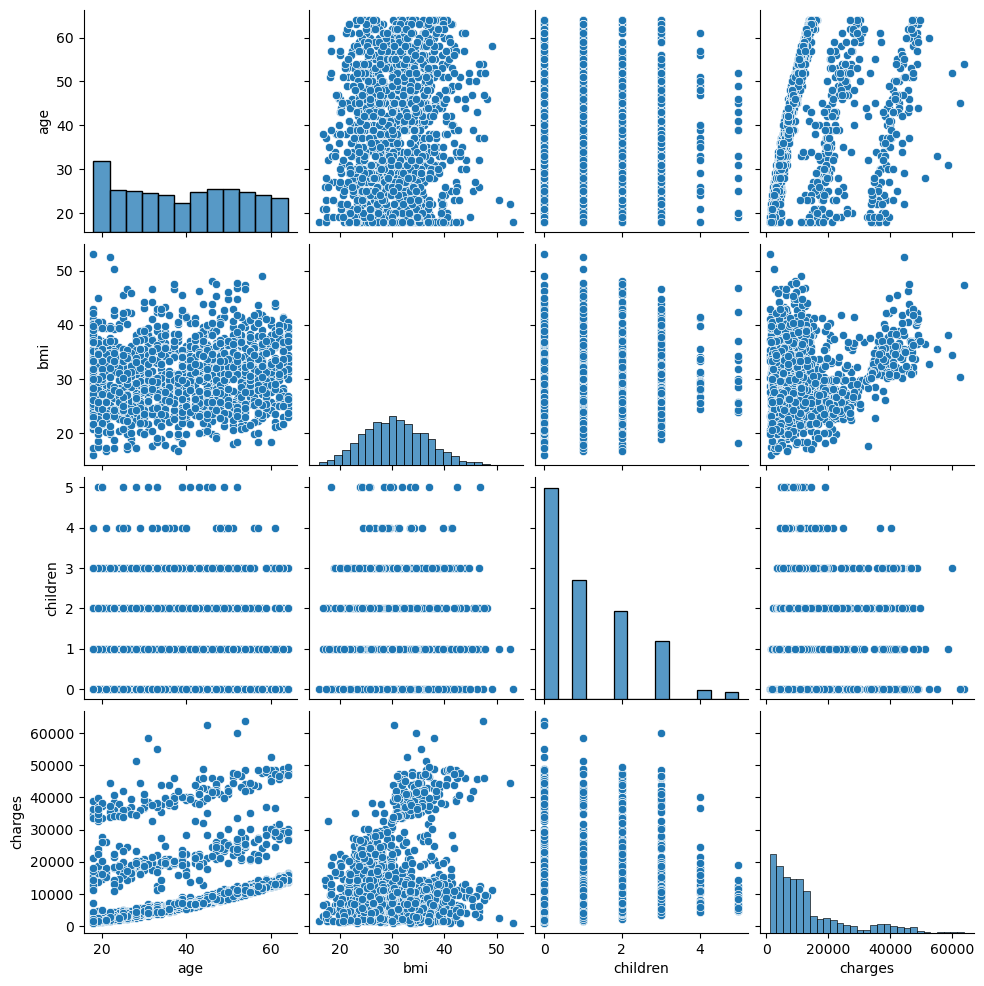

In [19]:
sns.pairplot(data)

<Axes: xlabel='bmi', ylabel='Count'>

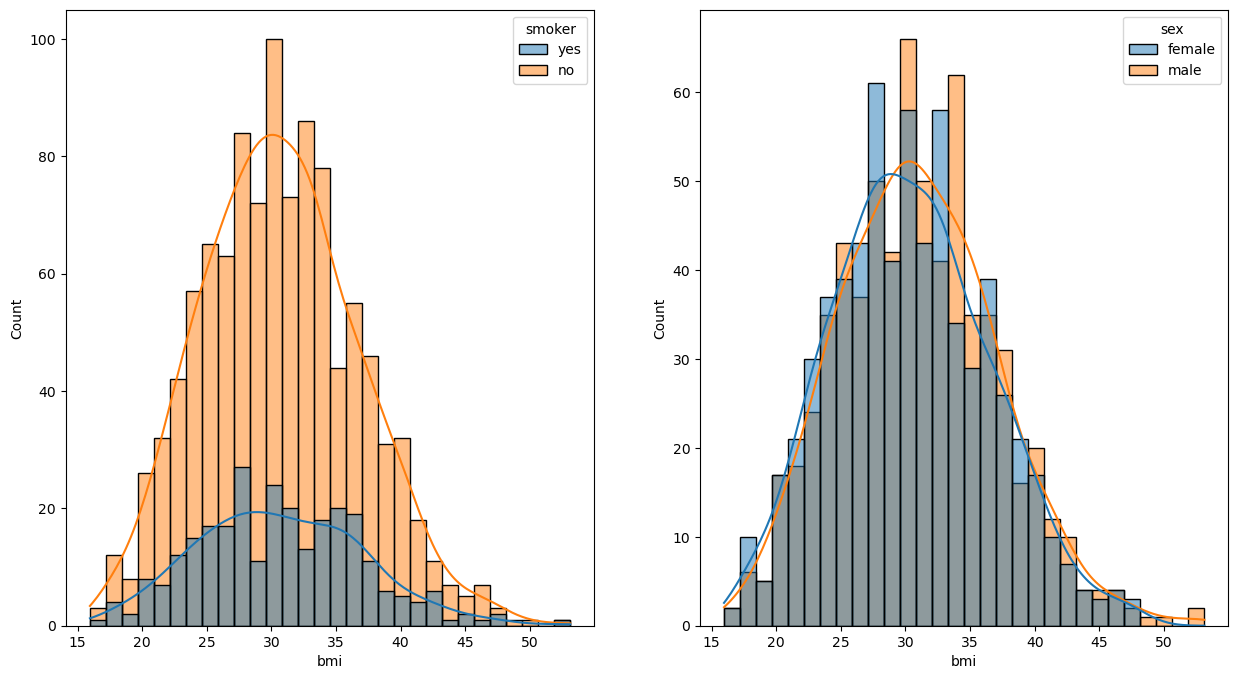

In [20]:
fig, axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data,x='bmi', kde=True, bins=30, hue='smoker')
plt.subplot(122)
sns.histplot(data, x='bmi', kde=True, bins=30, hue='sex')

<Axes: xlabel='bmi', ylabel='Count'>

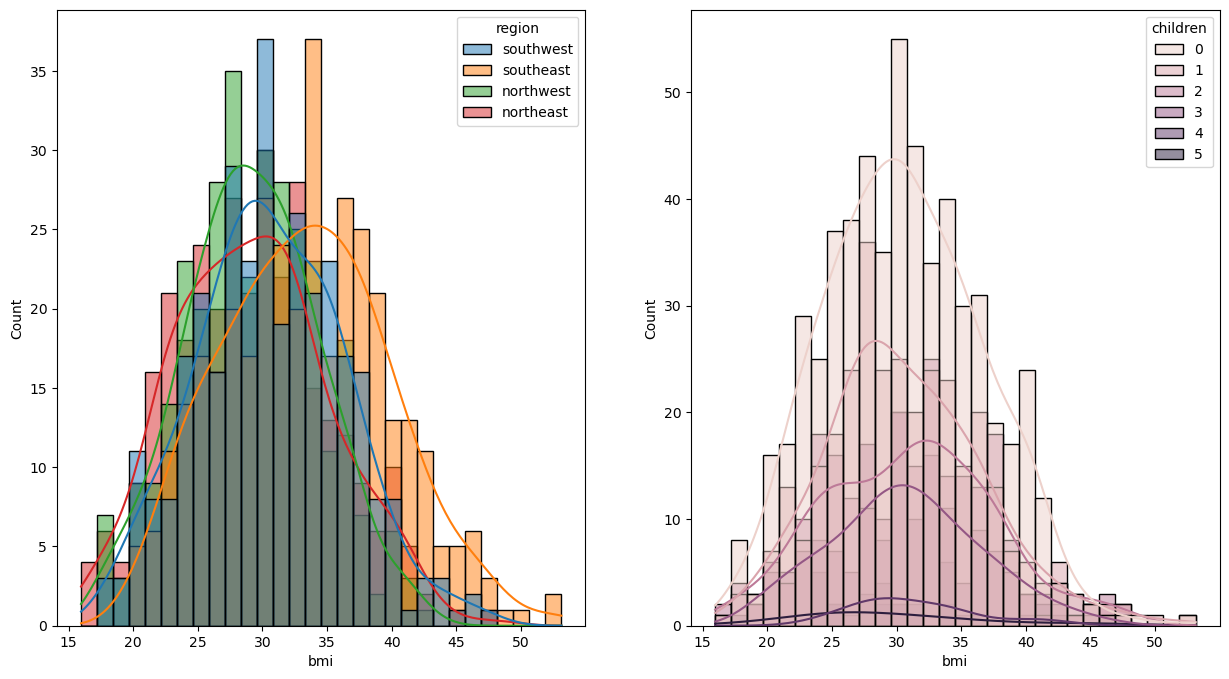

In [21]:
fig, axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data,x='bmi', kde=True, bins=30, hue='region')
plt.subplot(122)
sns.histplot(data, x='bmi', kde=True, bins=30, hue='children')

([<matplotlib.patches.Wedge at 0x137c7cbd0>,
 [Text(-0.016800012982034103, 1.0998717014105799, 'female'),
  Text(0.01832739922849574, -1.199860036186521, 'male')],
 [Text(-0.009163643444745873, 0.5999300189512253, '50.5'),
  Text(0.01069098288328918, -0.6999183544421372, '49.5')])

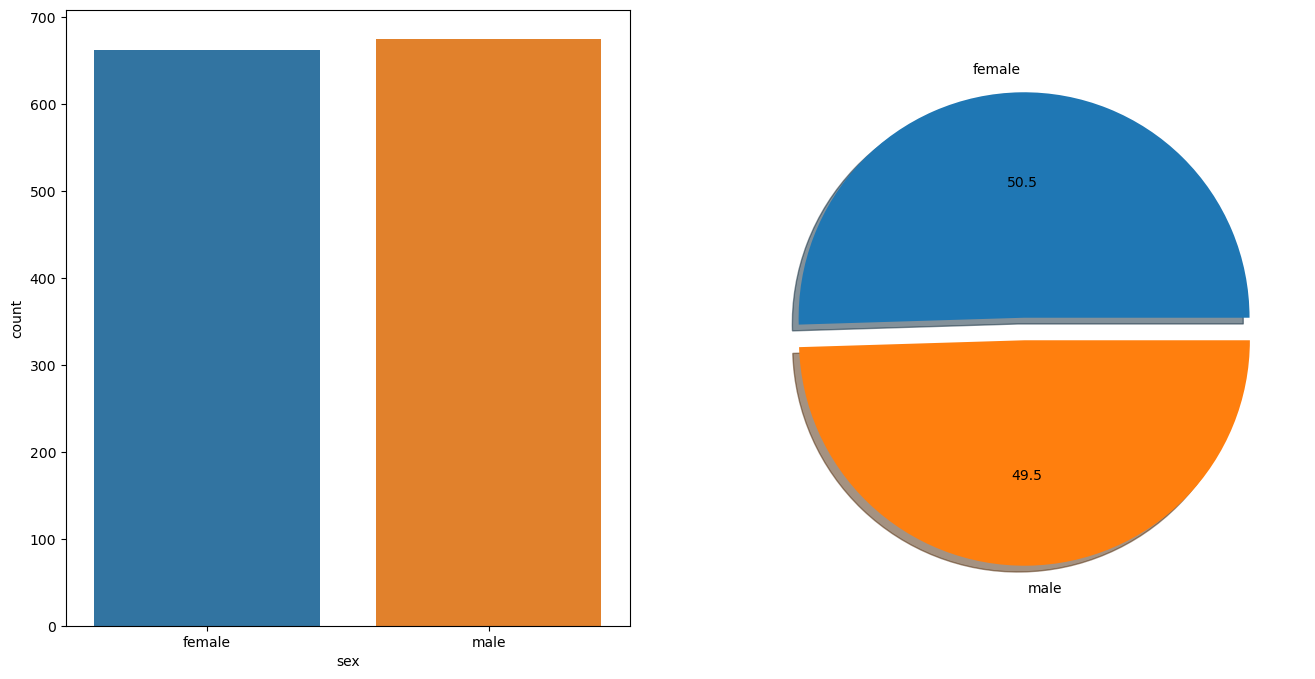

In [22]:
fig, axs=plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.countplot(data, x='sex')
plt.subplot(122)
plt.pie(x=data['sex'].value_counts(), explode=[0,0.1], labels=['female', 'male'], shadow=True, autopct='%1.1f')

([<matplotlib.patches.Wedge at 0x136d0ee50>,
 [Text(-0.8797849777822367, 0.6602865990376524, 'yes'),
  Text(0.9597653965876243, -0.7203126984254828, 'no')],
 [Text(-0.4798827151539472, 0.36015632674781034, '79.5'),
  Text(0.5598631480094475, -0.42018240741486496, '20.5')])

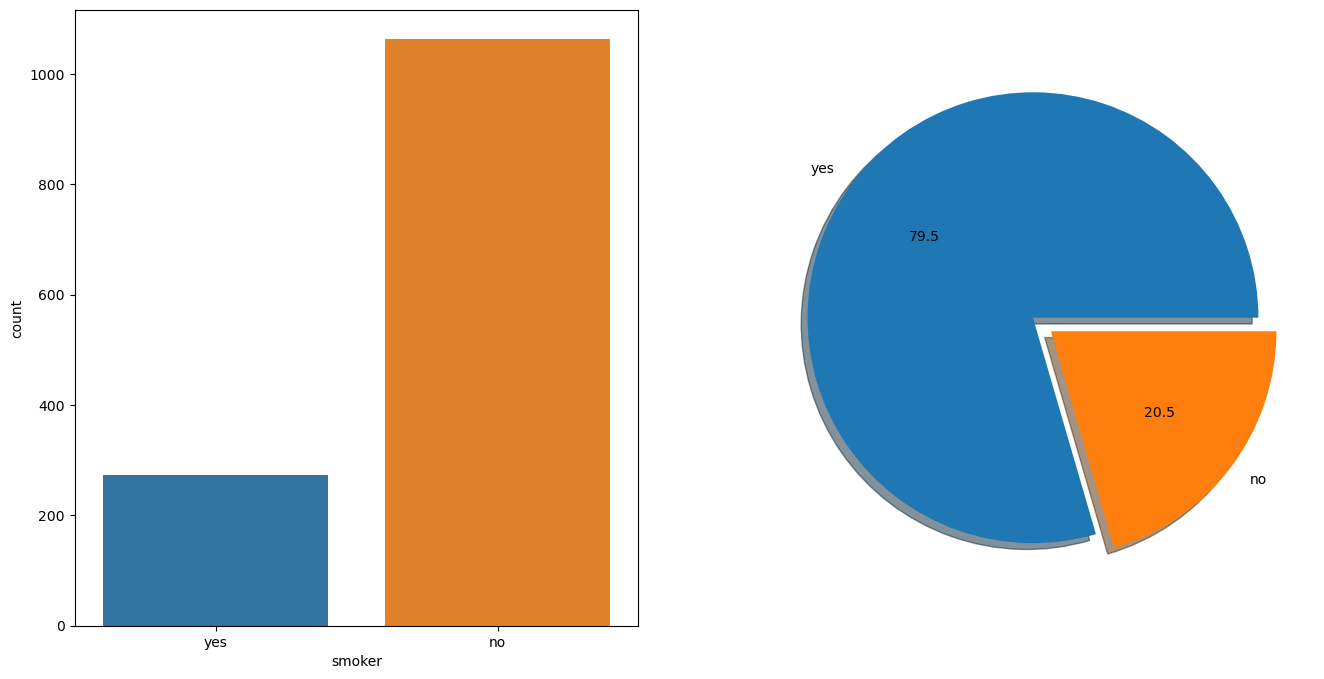

In [23]:
fig, axs=plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.countplot(data, x='smoker')
plt.subplot(122)
plt.pie(x=data['smoker'].value_counts(), explode=[0,0.1], labels=['yes', 'no'], shadow=True, autopct='%1.1f')

([<matplotlib.patches.Wedge at 0x137d6b590>,
 [Text(-0.09165062067589992, 1.0961752431658556, 'normal'),
  Text(0.04005392994571927, -1.0992705229814468, 'obese'),
  Text(1.1986751364137251, -0.05637301964182652, 'overweight')],
 [Text(-0.04999124764139995, 0.5979137689995575, '52.7'),
  Text(0.021847598152210507, -0.5996021034444254, '45.8'),
  Text(0.6992271629080062, -0.032884261457732135, '1.5')])

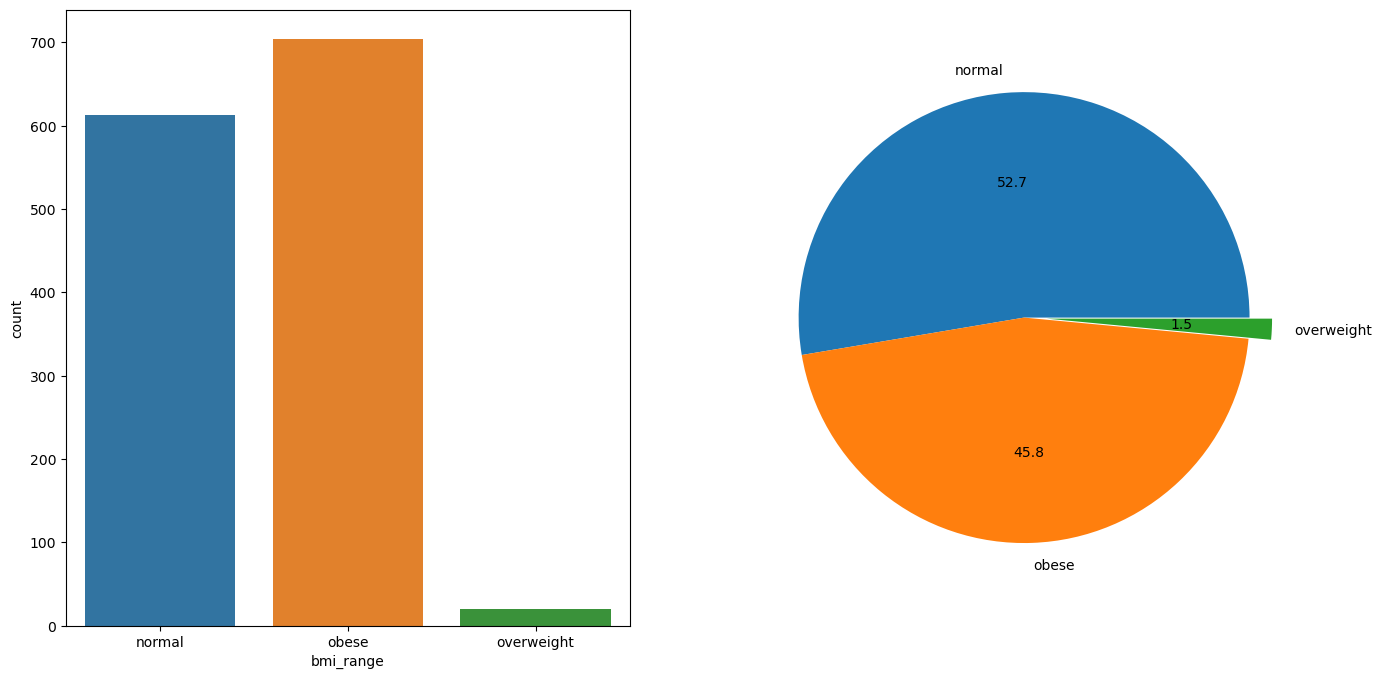

In [24]:
fig, axs=plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.countplot(data, x='bmi_range')
plt.subplot(122)
plt.pie(x=data['bmi_range'].value_counts(), explode=[0,0,0.1], labels=['normal', 'obese', 'overweight'], autopct='%1.1f')

<Axes: xlabel='bmi_range', ylabel='count'>

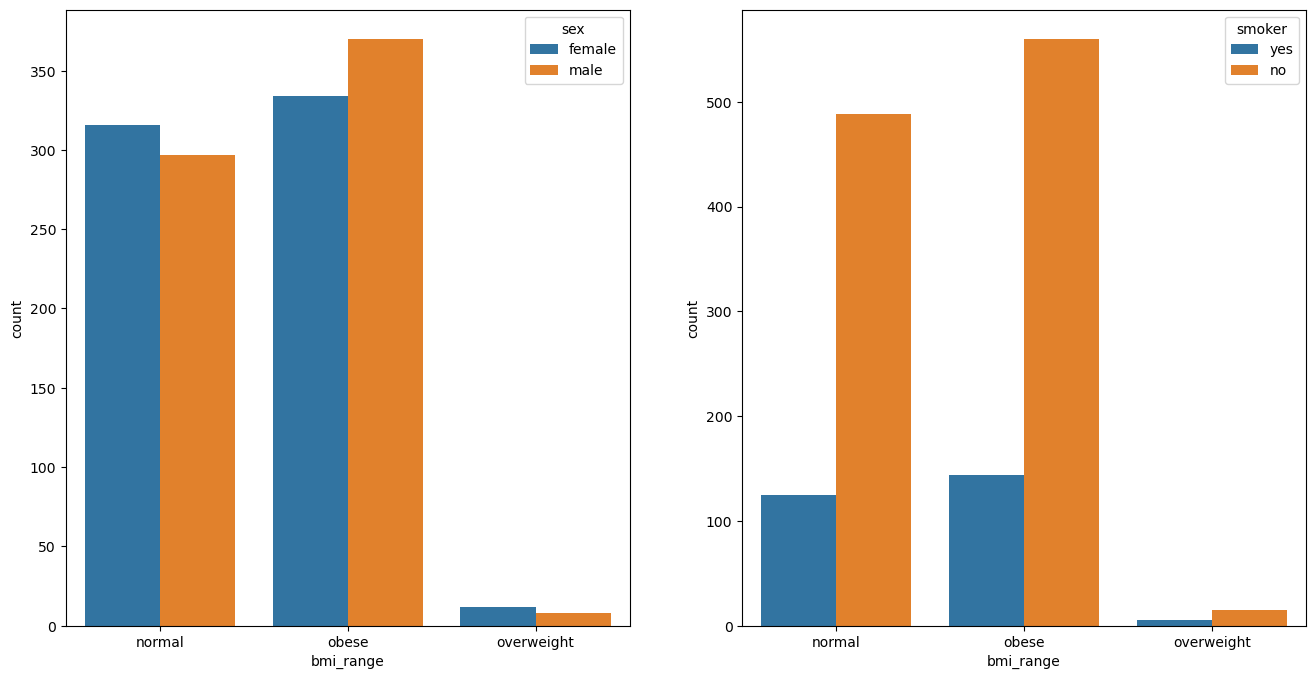

In [25]:
fig, axs=plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.countplot(data, x='bmi_range', hue='sex')
plt.subplot(122)
sns.countplot(data, x='bmi_range', hue='smoker')

<Axes: >

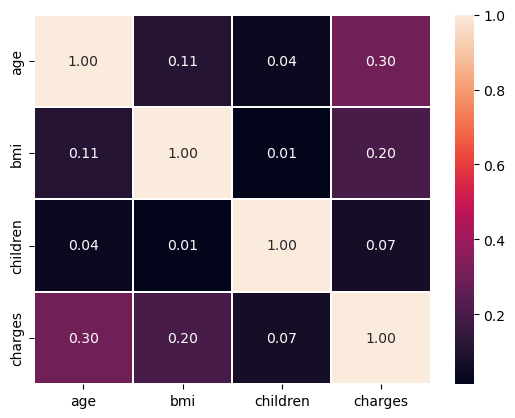

In [26]:
sns.heatmap(data[num_columns].corr(), annot=True, fmt='.2f', linewidth=0.1)

In [27]:
data[num_columns].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [28]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [29]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [30]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
data['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [32]:
X=data.drop('charges', axis=1)
y=data['charges']

In [33]:
X

,age,sex,bmi,children,smoker,region,bmi_range
0,19,female,27.900,0,yes,southwest,normal
1,18,male,33.770,1,no,southeast,obese
2,28,male,33.000,3,no,southeast,obese
3,33,male,22.705,0,no,northwest,normal
4,32,male,28.880,0,no,northwest,normal
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,obese
1334,18,female,31.920,0,no,northeast,obese
1335,18,female,36.850,0,no,southeast,obese
1336,21,female,25.800,0,no,southwest,normal


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=23)

In [37]:
X_train.shape, X_test.shape

((935, 7), (402, 7))

In [38]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [40]:
from sklearn.compose import ColumnTransformer

In [41]:
Scaler=StandardScaler()

In [42]:
OHE=OneHotEncoder(drop='first')

In [43]:
preprocessor=ColumnTransformer([
    ('OneHotEncoder', OHE, cat_features),
    ('StandardScaler', Scaler, num_features)
])

In [44]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['sex', 'smoker', 'region', 'bmi_range'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object'))])

In [45]:
X_train=preprocessor.fit_transform(X_train)

In [46]:
X_test=preprocessor.transform(X_test)

In [47]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.10478571,
        -0.28959641, -0.89671213],
       [ 1.        ,  0.        ,  0.        , ...,  0.46345212,
         1.19928192,  0.7651825 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.24967426,
        -0.88951965, -0.06576481],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.17841497,
        -0.88466198, -0.06576481],
       [ 0.        ,  0.        ,  0.        , ..., -0.6054372 ,
        -0.67092414, -0.89671213],
       [ 0.        ,  0.        ,  0.        , ...,  0.17841497,
        -0.2078255 ,  0.7651825 ]])

In [48]:
X_test

array([[ 1.        ,  0.        ,  0.        , ...,  0.81974856,
         1.44702351, -0.06576481],
       [ 1.        ,  0.        ,  1.        , ...,  0.03589639,
        -0.22806582, -0.06576481],
       [ 1.        ,  1.        ,  0.        , ..., -0.32040005,
        -0.48957083,  0.7651825 ],
       ...,
       [ 1.        ,  1.        ,  0.        , ..., -1.53180795,
         0.15650036, -0.89671213],
       [ 1.        ,  1.        ,  0.        , ...,  1.38982287,
         1.68019205, -0.06576481],
       [ 1.        ,  0.        ,  0.        , ..., -1.31803009,
        -1.70479996,  1.59612982]])

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
def model_evaluate(true, predicted):
    mse=mean_squared_error(true, predicted)
    mae=mean_absolute_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2=r2_score(true, predicted)
    
    return mse, mae, rmse, r2

In [51]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'Gradient Boosting Regresssor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K neighbors Regressor': KNeighborsRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2=model_evaluate(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2=model_evaluate(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Data : ")
    print("- Mean Squared Error : {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- R2 Score : {:.4f}".format(model_train_r2))
    
    
    print("---------------------------------------------------------------")
    
    print("Model Performance for Testing Data : ")
    
    print("- Mean Squared Error : {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print("="*35)
    print("\n")
                      

    

Linear Regression
Model Performance for Training Data : 
- Mean Squared Error : 35747177.4349
- Mean Absolute Error : 4193.8714
- Root Mean Squared Error : 5978.8943
- R2 Score : 0.7576
---------------------------------------------------------------
Model Performance for Testing Data : 
- Mean Squared Error : 36023802.1901
- Mean Absolute Error : 4252.7776
- Root Mean Squared Error : 6001.9832
- R2 Score : 0.7506


Ridge
Model Performance for Training Data : 
- Mean Squared Error : 35751486.1612
- Mean Absolute Error : 4196.8968
- Root Mean Squared Error : 5979.2546
- R2 Score : 0.7575
---------------------------------------------------------------
Model Performance for Testing Data : 
- Mean Squared Error : 35980278.3228
- Mean Absolute Error : 4254.3935
- Root Mean Squared Error : 5998.3563
- R2 Score : 0.7509


Lasso
Model Performance for Training Data : 
- Mean Squared Error : 35747250.2979
- Mean Absolute Error : 4193.3729
- Root Mean Squared Error : 5978.9004
- R2 Score : 0.7576


In [52]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Gradient Boosting Regresssor,0.850565
5,Random Forest Regressor,0.828323
3,Ada Boost Regressor,0.820225
1,Ridge,0.750917
2,Lasso,0.750641
0,Linear Regression,0.750616
7,Decision Tree Regressor,0.705796
8,K neighbors Regressor,0.656855
6,Support Vector Regressor,-0.100803
